In [29]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
workload_list = [
# '502.gcc_r',
'605.mcf_s',
# '519.lbm_r',
'620.omnetpp_s',
# '549.fotonik3d_r',
'654.roms_s',
'657.xz_s'
]
scheme_list = ['Read Hit', 'Write Hit (no overflow)', 'Read Miss', 'Write Miss', 'Write Overflow']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

fig_title = 'Access Breakdown'
fig_name = 'fig_access_breakdown'
fig_ylim = (0, 1)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.1, 0.25))
# hit_colors = easypyplot.color.color_scale(easypyplot.color.COLOR_SET[1], 2, low=0.65, high=0.8)[::-1]
hit_colors = ['#c8e6c9', '#A2BAA3']
# miss_colors = easypyplot.color.color_scale(easypyplot.color.COLOR_SET[2], 2, low=0.65, high=0.8)[::-1]
miss_colors = ['#e6aecf', '#C494B0']
overflow_color = [easypyplot.color.COLOR_SET[5]]
fig_bar_colors = hit_colors + miss_colors + overflow_color
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [31]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.5
fig_dims = (5, 2.5)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [32]:
''' Load data from file. '''
csv_path = './layout_access_breakdown/stability_stagecommit.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels = []
fig_stage_xticks = []
fig_data_stage_2darr = []
xtick = 1
schemedict1 = ['Stage_' + item for item in scheme_dict]
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in schemedict1):
                row_value.append(row[col])
        fig_data_stage_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 2
        fig_stage_xticks.append(xtick)
assert len(fig_data_stage_2darr) == len(fig_xlabels) == len(fig_stage_xticks)

In [33]:
''' Load data from file. '''
csv_path = './layout_access_breakdown/stability_stagecommit.csv'
csv_hd = pd.read_csv(csv_path, sep=',')
fig_commit_xticks = []
fig_data_commit_2darr = []
xtick = 1.5
schemedict1 = ['Commit_' + item for item in scheme_dict]
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in schemedict1):
                row_value.append(row[col])
        fig_data_commit_2darr.append(row_value)
        xtick += 2
        fig_commit_xticks.append(xtick)
assert len(fig_data_commit_2darr) == len(fig_xlabels) == len(fig_commit_xticks)

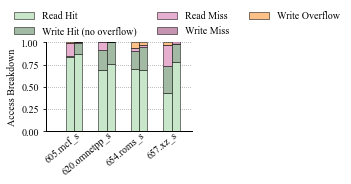

In [34]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.add_subplot(1, 2, 1)
easypyplot.format.turn_off_box(ax)
fig_xlabels = workload_list
h = easypyplot.barchart.draw(
    ax, fig_data_stage_2darr,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=fig_stage_xticks,
    # xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40, # Uncomment this for rotated x tick labels
    prop=ft, # Uncomment if easypyplot supports font
    colors=fig_bar_colors)
h2 = easypyplot.barchart.draw(
    ax, fig_data_commit_2darr,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=fig_commit_xticks,
    # xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=40, # Uncomment this for rotated x tick labels
    prop=ft, # Uncomment if easypyplot supports font
    colors=fig_bar_colors)

''' x axis '''
ax.xaxis.set_tick_params(pad=-5)
ax.set_xlim([ax.get_xticks()[0] - 2, ax.get_xticks()[-1] + 1])
fig_xticks_fix = [item +0.7 for item in fig_stage_xticks]
# fig_xticks_fix[0] -= 0.2
ax.set_xticks(fig_xticks_fix)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft, ha='right')
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
str_yticks = ['%.2f' % item for item in fig_yticks]
ax.set_yticklabels(str_yticks, fontsize=fig_label_fontsize, fontproperties=ft)
ax.set_ylabel(fig_title, multialignment='center', fontsize=fig_label_fontsize, fontproperties=ft)

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=3, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [35]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures